## This Kernel details the EDA realted to the Boston crimes. Here, only the most serious crimes are considered for the study.

#### Contents of this kernel are as follows -

Data Cleaning

Which crimes are more frequent

When do these crimes occur

Where do they occur

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crimedf = pd.read_csv("crime.csv",encoding = "ISO-8859-1")
crimedf.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
crimedf.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [4]:
# cleaning the data

#removing unnecessary columns
crimedf = crimedf.drop(["REPORTING_AREA","INCIDENT_NUMBER","OFFENSE_CODE","Location"],axis =1)

# the min value of lat is -1 and max value of long is -1. These need to be changed to None
crimedf.Lat.replace(-1,None,inplace = True)
crimedf.Long.replace(-1,None,inplace = True)

# chaging the column names to lower case
crimedf = crimedf.rename(str.lower,axis='columns')

In [5]:
# Data Checks
crimedf.isnull().sum()

offense_code_group          0
offense_description         0
district                 1765
shooting               318054
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                   90
street                  10871
lat                     20044
long                    20044
dtype: int64

In [6]:
print(set(crimedf.shooting))
crimedf.shooting.fillna('N',inplace=True)

# considering only the serious crimes which come under part one
crimedf = crimedf[crimedf.ucr_part == 'Part One'].drop("ucr_part",axis=1)
crimedf.head()

{nan, 'Y'}


,offense_code_group,offense_description,district,shooting,occurred_on_date,year,month,day_of_week,hour,street,lat,long
0,Larceny,LARCENY ALL OTHERS,D14,N,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371
6,Auto Theft,AUTO THEFT,B2,N,2018-09-03 21:25:00,2018,9,Monday,21,NORMANDY ST,42.306072,-71.082733
8,Robbery,ROBBERY - STREET,C6,N,2018-09-03 20:48:00,2018,9,Monday,20,MASSACHUSETTS AVE,42.331521,-71.070853
19,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,N,2018-09-02 18:00:00,2018,9,Sunday,18,SHIRLEY ST,42.325695,-71.068168
24,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,N,2018-09-03 18:38:00,2018,9,Monday,18,ANNUNCIATION RD,42.335062,-71.093168


#### Crimes occured over the years 

Text(46.22517180266203, 0.5, 'crime')

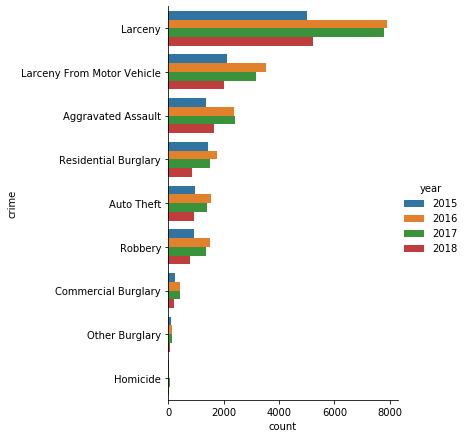

In [7]:
sns.catplot(y='offense_code_group',kind = 'count',hue = "year",
            height = 6,
            order = crimedf.offense_code_group.value_counts().index,
            data=crimedf)
plt.ylabel("crime")

Larceny is the highest commited crime of all which is more than 50% of the second highest commited crime. Also, It is evident that crimes are being reduced from 2016 to 2017 to 2018.

### When do these crime occur

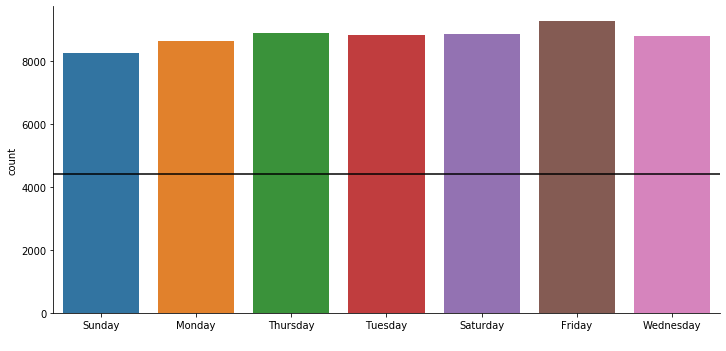

In [8]:
sns.catplot(x="day_of_week",kind='count',aspect=2,data =crimedf)
plt.xlabel(" ")
plt.xticks(size=10)
plt.yticks(size=10)
plt.axhline(len(crimedf)/14,color='black')

Text(0.5, 6.800000000000029, ' ')

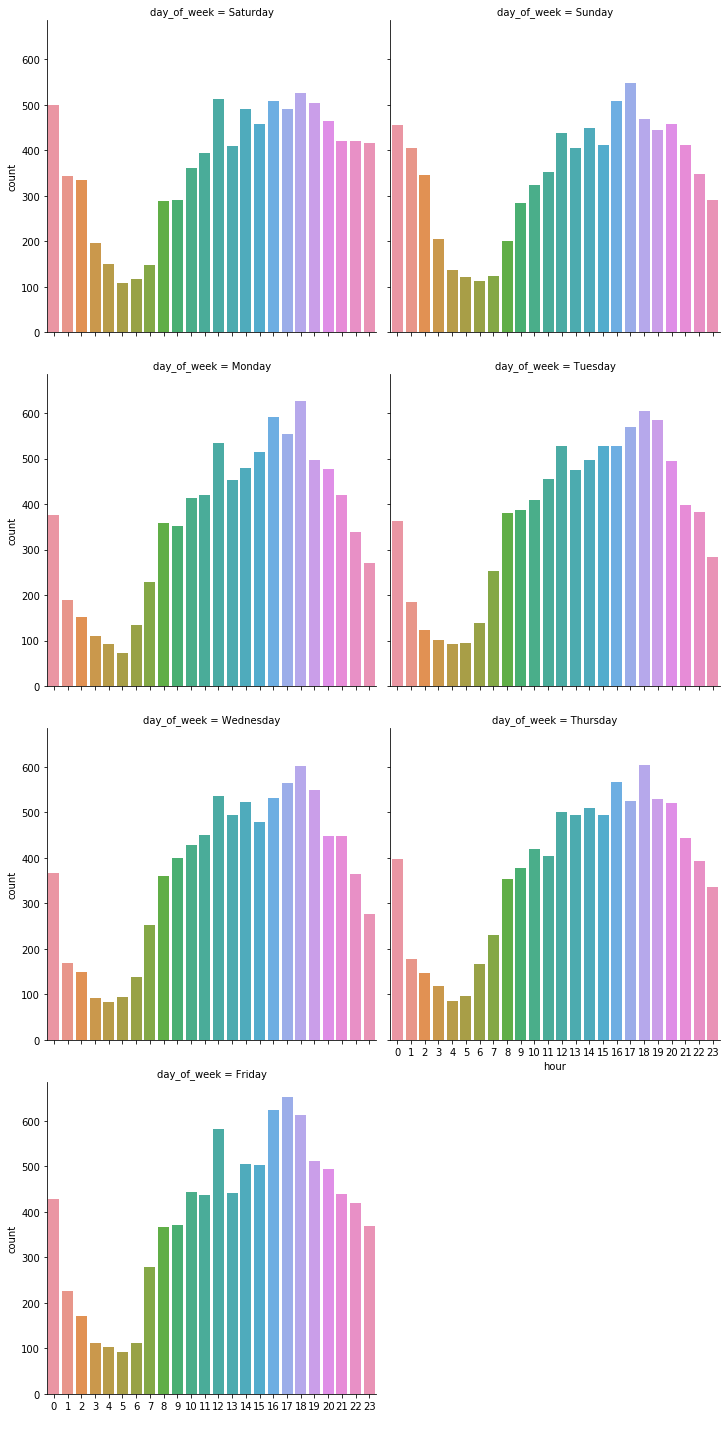

In [9]:
sns.catplot(x="hour",kind='count',data =crimedf,col='day_of_week',col_wrap=2,
           col_order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.xlabel(" ")

#### All the days have same trend which is that, after 12am the crimes are low till 6am and starts increeasing till 6pm and then strats decreasing. The peaks hours for the crimes are between 4pm-6pm. Also, Friday evenings are more prone to crimes than the saturday and  sunday's

### Where do they occur

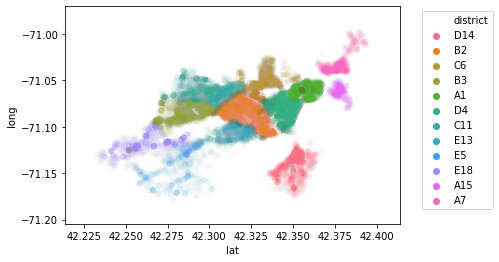

In [10]:
sns.scatterplot(x='lat',y='long',data=crimedf,alpha=0.01,hue='district')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

District B2 and A1 are having higher crimes.